# Introduction

(Last updated: Jun 12, 2024)


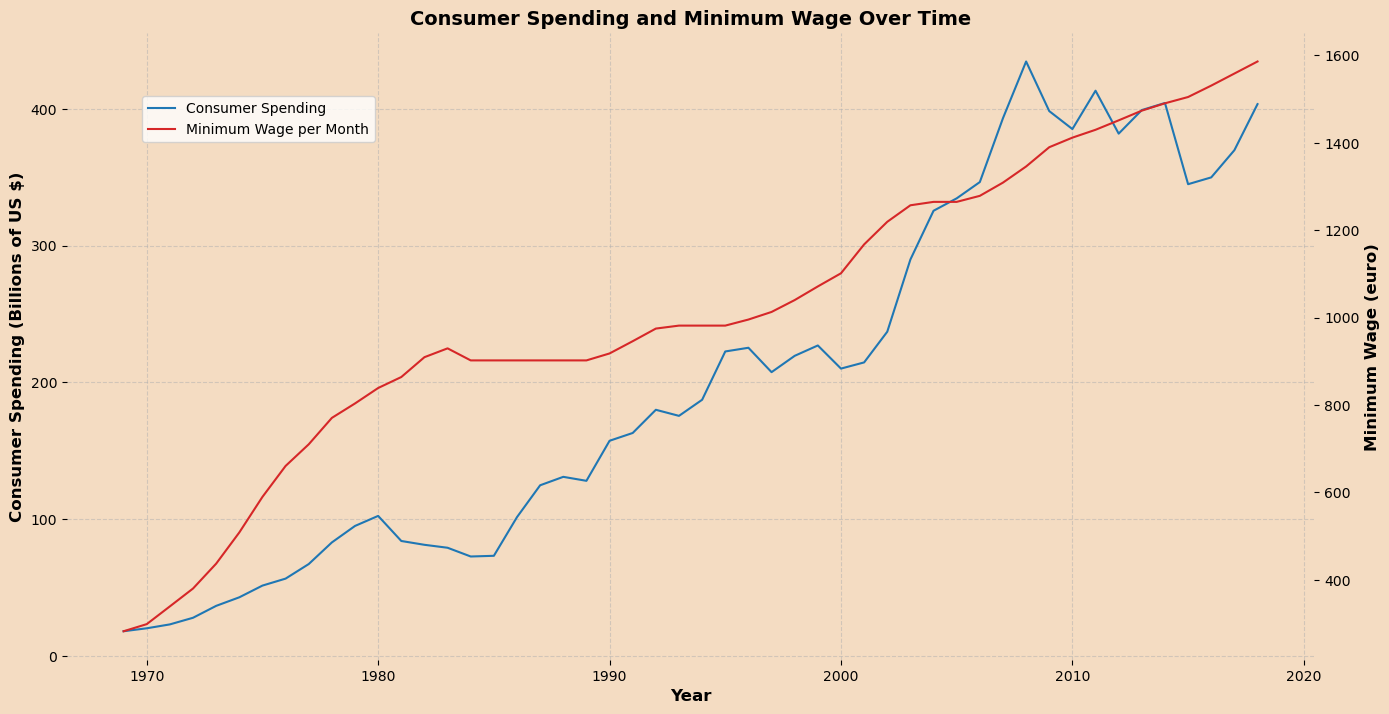

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_consumer_spending_and_minimum_wage():
    minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
    consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

    consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]

    minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
    consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

    merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

    fig, ax1 = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor('#f4dcc2')
    ax1.set_facecolor('#f4dcc2')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Consumer Spending (Billions of US $)', color='black', fontsize=12, fontweight='bold')
    ax1.plot(merged_df['year'], merged_df[' Billions of US $'], color='tab:blue', label='Consumer Spending')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.tick_params(axis='x', colors='black')

    ax1.grid(True, linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    ax2.set_facecolor('#f4dcc2')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_ylabel('Minimum Wage (euro)', color='black', fontsize=12, fontweight='bold')
    ax2.plot(merged_df['year'], merged_df['minimum wage per month (euro)'], color='tab:red', label='Minimum Wage per Month')
    ax2.tick_params(axis='y', labelcolor='black')

    plt.title('Consumer Spending and Minimum Wage Over Time', fontsize=14, fontweight='bold')

    fig.tight_layout() 
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

    fig.subplots_adjust(top=0.98)

    plt.show()

# Call the function to plot the graph
plot_consumer_spending_and_minimum_wage()


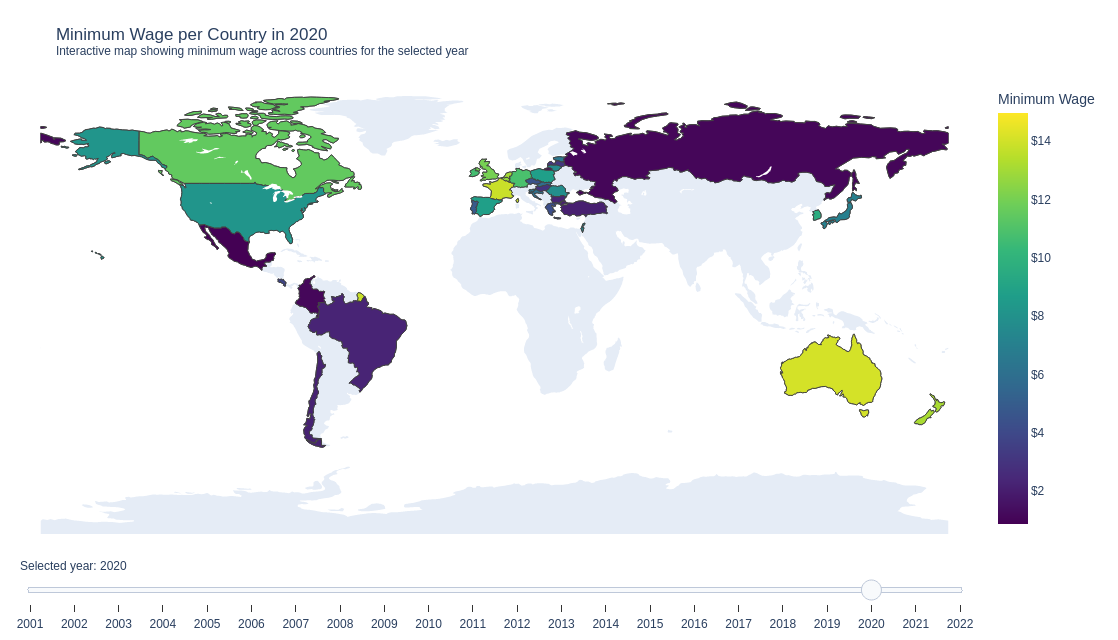

In [31]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('minimum_wage_worldwide.csv')

# Filter the data for the year 2020
df_2020 = df[df['TIME_PERIOD'] == 2020]

# Check if necessary columns are present
required_columns = ['REF_AREA', 'OBS_VALUE']
if not all(column in df_2020.columns for column in required_columns):
    raise ValueError(f"The required columns {required_columns} are not present in the dataset.")

# Function to create the plot title
def make_title(year: int) -> str:
    return f'Minimum Wage per Country in {year}' + \
           '<br><sup>Interactive map showing minimum wage across countries for the selected year</sup>'

# Gather unique years in the dataset and sort them
years = sorted(df['TIME_PERIOD'].unique())

# Create traces (maps with data) for each year
traces = []
for i, year in enumerate(years):
    df_year = df[df['TIME_PERIOD'] == year]
    trace = go.Choropleth(
        locations=df_year['REF_AREA'],
        locationmode='ISO-3',
        z=df_year['OBS_VALUE'],
        colorscale='Viridis',
        hovertemplate='<b>%{location}</b><br>Minimum wage: %{z}<extra></extra>',
        visible=(True if year == 2020 else False),  # make trace for 2020 visible by default
        colorbar=go.choropleth.ColorBar(
            title='Minimum Wage',
            tickprefix='$'
        ),
    )
    traces.append(trace)

# Create the slider steps
slider_steps = []
for i, year in enumerate(years):
    slider_steps.append({
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(traces))]},
            {'title': make_title(year)},
        ],
        'label': str(year)
    })

# Create the main figure
fig = go.Figure(
    data=traces,
    layout=go.Layout(
        width=790,
        height=640,
        title=make_title(2020),
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        sliders=[{
            'active': years.index(2020),
            'currentvalue': {'prefix': 'Selected year: '},
            'steps': slider_steps
        }],
        margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
    )
)

# Add caption above the slider

fig.show()


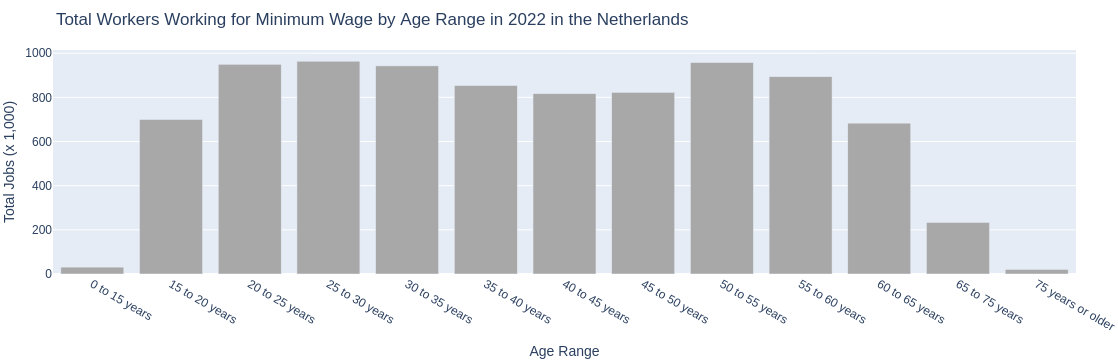

In [32]:
import pandas as pd
import plotly.express as px

# Define the data as a dictionary with English variable names
data = {
    "Age Range": [
        "0 to 15 years", "15 to 20 years", "20 to 25 years", "25 to 30 years",
        "30 to 35 years", "35 to 40 years", "40 to 45 years", "45 to 50 years",
        "50 to 55 years", "55 to 60 years", "60 to 65 years", "65 to 75 years", "75 years or older"
    ],
    "Total Jobs (x 1,000)": [
        31.2, 699.5, 949.8, 963.8, 942.6, 853.4, 816.7, 822.7,
        957.6, 893.5, 683.2, 233.4, 20.5
    ]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Create the bar chart using Plotly
fig = px.bar(
    df,
    x="Age Range",
    y="Total Jobs (x 1,000)",
    title="Total Workers Working for Minimum Wage by Age Range in 2022 in the Netherlands",
    labels={"Total Jobs (x 1,000)": "Total Jobs (x 1,000)", "Age Range": "Age Range"}
)

# Update the bar chart to remove the legend and set all bars to the same color
fig.update_traces(marker_color='#a8a8a8', showlegend=False)

# Update layout for better presentation
fig.update_layout(
    xaxis_title='Age Range',
    yaxis_title='Total Jobs (x 1,000)',
    title="Total Workers Working for Minimum Wage by Age Range in 2022 in the Netherlands",
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

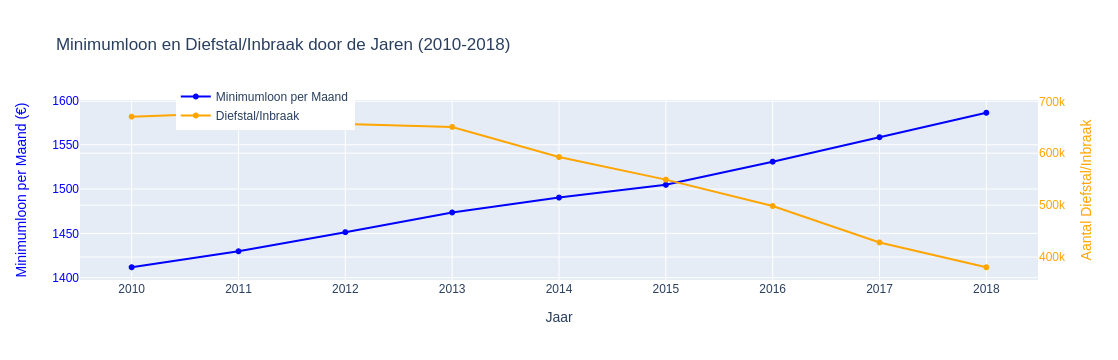

In [33]:
import plotly.graph_objects as go

# Gegevens
jaren = list(range(2010, 2019))
diefstal_inbraak = [670470, 677970, 656450, 650650, 592590, 549105, 498285, 428135, 380320]
min_wage_month = [1411.8, 1429.8, 1451.4, 1473.6, 1490.4, 1504.8, 1530.9, 1558.5, 1586.1]

# Visualisatie
fig = go.Figure()

# Lijn voor minimumloon
fig.add_trace(go.Scatter(x=jaren, y=min_wage_month, mode='lines+markers', name='Minimumloon per Maand', line=dict(color='blue')))

# Lijn voor diefstal/inbraak
fig.add_trace(go.Scatter(x=jaren, y=diefstal_inbraak, mode='lines+markers', name='Diefstal/Inbraak', line=dict(color='orange'), yaxis='y2'))

# Configuratie van de assen
fig.update_layout(
    yaxis=dict(
        title='Minimumloon per Maand (€)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Aantal Diefstal/Inbraak',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    title='Minimumloon en Diefstal/Inbraak door de Jaren (2010-2018)',
    xaxis_title='Jaar',
    legend=dict(x=0.1, y=1.1)
)

fig.show()